# 🧪 Early Detection of Diabetes – An EDA Approach

## 📝 Problem Statement

Diabetes is a metabolic disease that causes high blood sugar. If left untreated, it can lead to serious complications like heart disease, kidney failure, and blindness. Early diagnosis and lifestyle adjustments can prevent or delay its onset.

In this project, we will perform **Exploratory Data Analysis (EDA)** on a real-world dataset from the **Pima Indian population**, which contains health-related features of women over the age of 21. Our goal is to:
- Understand the data distribution and detect missing or incorrect values.
- Explore feature relationships with the outcome variable (diabetes or not).
- Identify trends or indicators that may help predict diabetes risk.

### 📁 Dataset Link

[🔗 Pima Indians Diabetes Dataset - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Dataset shape and info
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns")
df.info()
df.describe()


Dataset contains 768 rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Replace 0 with NaN in certain columns
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)

# Check missing values
df.isnull().sum


<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False    False          False          False     True  False   
2          False    False          False           True     True  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False     True  False   
765        False    False          False          False    False  False   
766        False    False          False           True     True  False   
767        False    False          False          False     True  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]>

In [ ]:
df[cols_with_invalid_zero]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
cols_with_invalid_zero

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# Fill missing values with median
for col in cols_with_invalid_zero:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-24235726.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


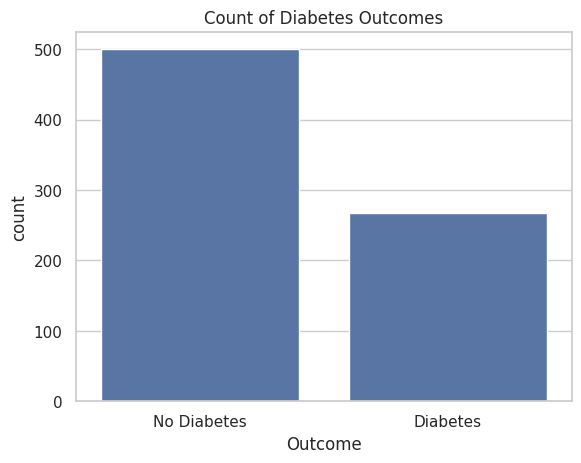

In [ ]:
# Countplot of target variable
sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetes Outcomes")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


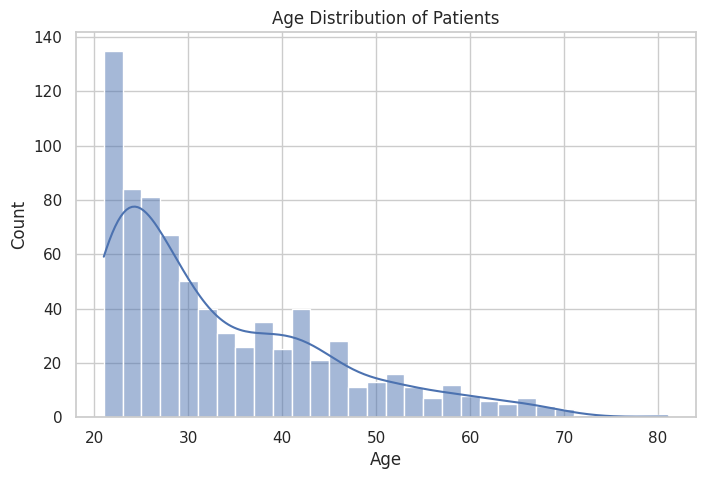

In [ ]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.show()


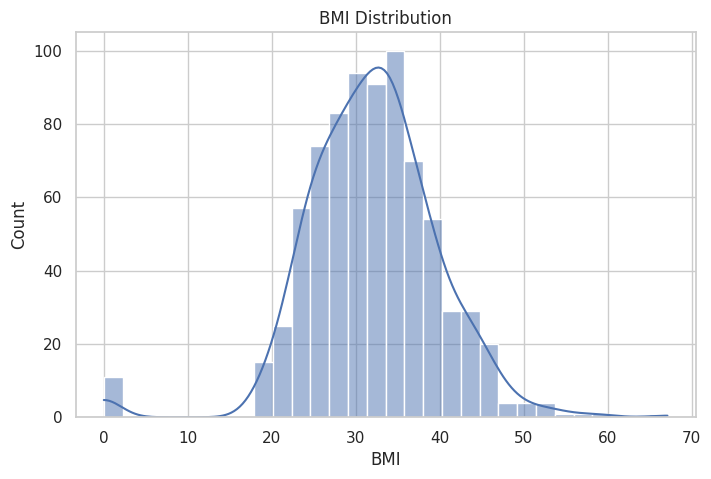

In [ ]:
# BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()


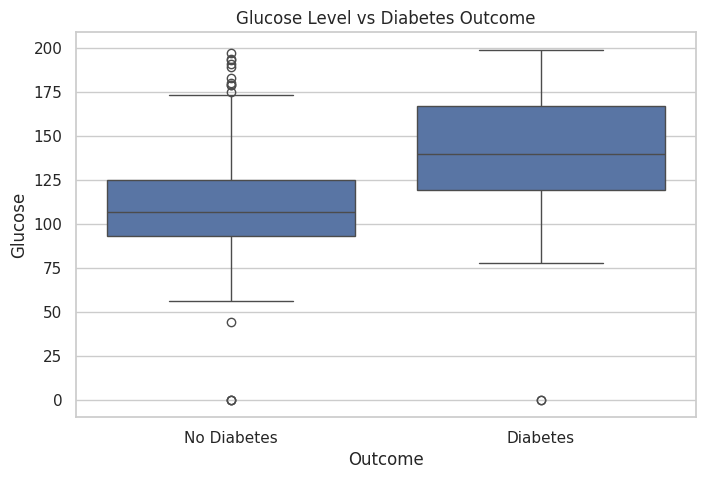

In [ ]:
# Glucose vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Level vs Diabetes Outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


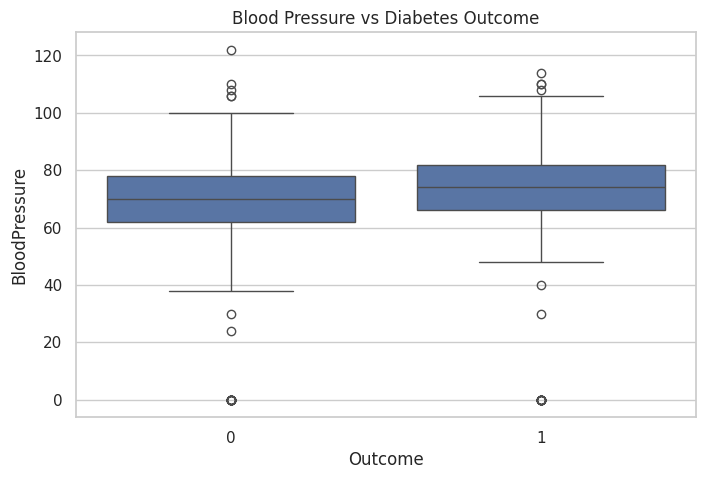

In [ ]:
# Blood Pressure vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title("Blood Pressure vs Diabetes Outcome")
plt.show()


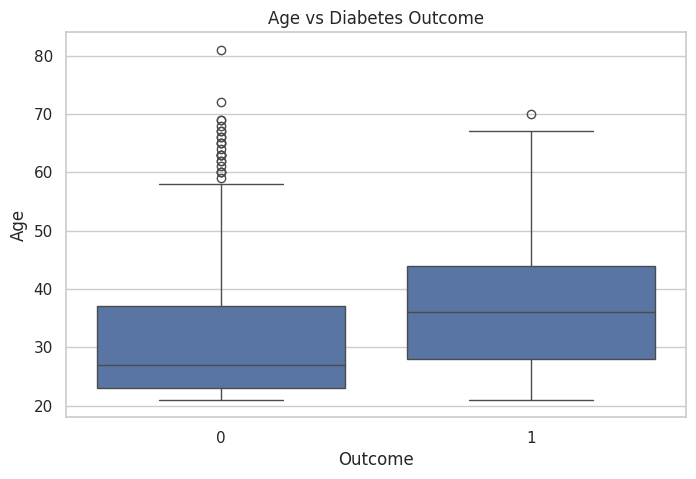

In [ ]:
# Age vs Outcome
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

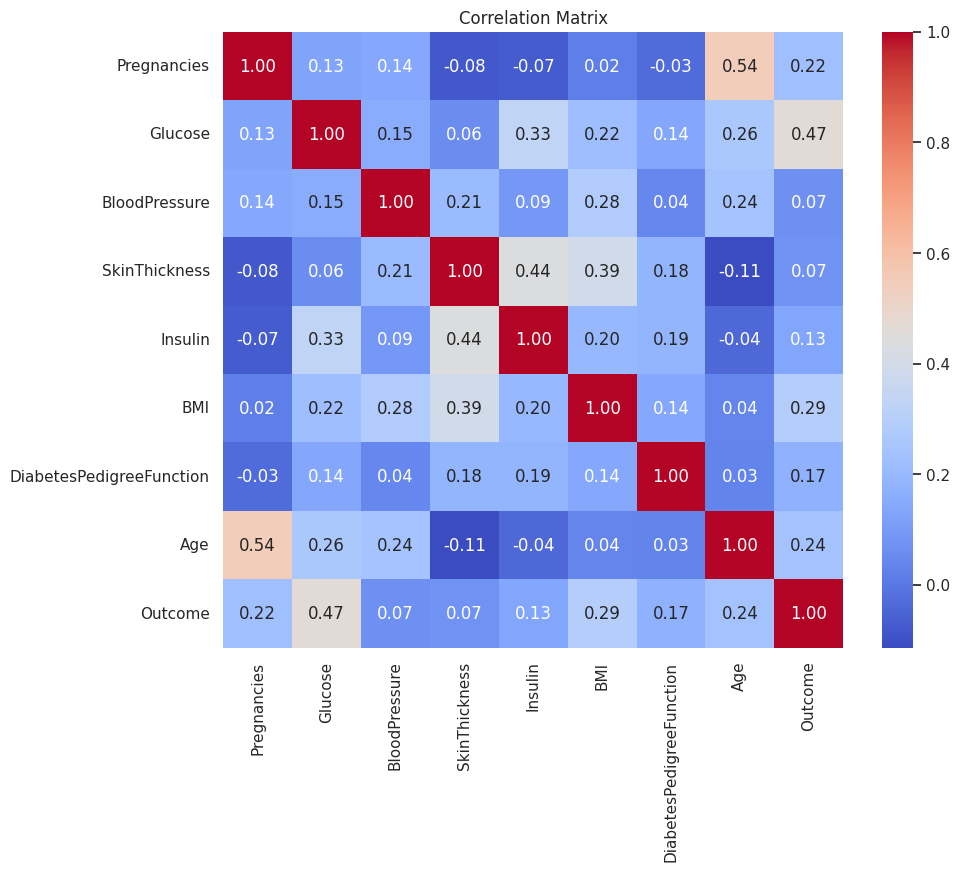

In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")



In [ ]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## ✅ Summary of Insights

- Dataset shows **class imbalance**.
- Diabetic individuals tend to have **higher Glucose, BMI, and Age**.
- **Invalid zeros** needed to be handled in several features.
- **Correlation heatmap** highlights important features for predictive modeling.

You can now move forward to predictive modeling using Logistic Regression, Decision Trees, or any classifier of your choice.
